### User settings

In [2]:
data_path = "./data/"

### Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from thermopot import materials, calculations, reactions, potentials, potential 

### Read in data and build materials

In [4]:
BaZrS3_calc = calculations.AimsCalculation(data_path+"raw_aims_files/ternary/BaZrS3_Pnma/scan/aims.out")

BaS_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/BaS_Fm-3m/scan/aims.out")
BaS2_calc  = calculations.AimsCalculation(data_path+"raw_aims_files/binary/BaS2_C2_c/scan/aims.out")
BaS3_P4_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/BaS3_P-421m/scan/aims.out")
BaS3_P2_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/BaS3_P2_12_12/scan/aims.out")
Ba2S3_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/Ba2S3_I4_1md/scan/aims.out")

ZrS_P4_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/ZrS_P4_nmm/scan/aims.out")
ZrS_Fm_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/ZrS_Fm-3m/scan/aims.out")
ZrS3_P2_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/ZrS3_P2_1m/scan/aims.out")
ZrS2_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/ZrS2_P-3m1/scan/aims.out")
Zr3S4_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/Zr3S4_Fd-3m/scan/aims.out")

Ba_calc = calculations.AimsCalculation(data_path+"raw_aims_files/elemental/Ba_Im-3m/scan/aims.out")
Zr_calc = calculations.AimsCalculation(data_path+"raw_aims_files/elemental/Zr_P63_mmc/scan/aims.out")
S_calc = calculations.AimsCalculation(data_path+"raw_aims_files/elemental/S_P2_c/scan/aims.out")

S2_calculation = calculations.AimsCalculation(data_path+"raw_aims_files/elemental/S2/scan/aims.out",gas=True)
S8_calculation = calculations.AimsCalculation(data_path+"raw_aims_files/elemental/S8/scan/aims.out",gas=True)

In [5]:
BaZrS3 = materials.Solid("BaZrS3",{"Ba": 1,"Zr": 1,"S":3},data_path+"phonopy_output/BaZrS3_Pnma.dat",calculation=BaZrS3_calc)

BaS = materials.Solid("BaS", {"Ba":1, "S": 1},data_path+"phonopy_output/BaS_Fm-3m.dat",calculation=BaS_calc)
BaS2 = materials.Solid("BaS2", {"Ba":1, "S": 2},data_path+"phonopy_output/BaS2_C2_c.dat",calculation=BaS2_calc)
BaS3_P4 = materials.Solid("BaS3", {"Ba":1, "S": 3},data_path+"phonopy_output/BaS3_P-421m.dat",calculation=BaS3_P4_calc)
BaS3_P2 = materials.Solid("BaS3_P2", {"Ba":1, "S": 3},data_path+"phonopy_output/BaS3_P2_12_12.dat",calculation=BaS3_P2_calc)
Ba2S3 = materials.Solid("Ba2S3", {"Ba":2, "S": 3},data_path+"phonopy_output/Ba2S3_I4_1md.dat",calculation=Ba2S3_calc)

ZrS_P4 = materials.Solid("ZrS2",{"Zr": 1,"S": 1},data_path+"phonopy_output/ZrS_P4_nmm.dat",calculation=ZrS_P4_calc)
ZrS_Fm = materials.Solid("ZrS2",{"Zr": 1,"S": 1},data_path+"phonopy_output/ZrS_Fm-3m.dat",calculation=ZrS_Fm_calc)
ZrS3_P2 = materials.Solid("ZrS2",{"Zr": 1,"S": 3},data_path+"phonopy_output/ZrS3_P2_1m.dat",calculation=ZrS3_P2_calc)
ZrS2 = materials.Solid("ZrS2",{"Zr": 1,"S": 2},data_path+"phonopy_output/ZrS2_P-3m1.dat",calculation=ZrS2_calc)
Zr3S4 = materials.Solid("ZrS2",{"Zr": 3,"S": 4},data_path+"phonopy_output/Zr3S4_Fd-3m.dat",calculation=Zr3S4_calc)

S8 = materials.IdealGas("S8",{'S':8},data_path+"nist_janaf/S8.dat",calculation=S8_calculation,zpe_lit=0.39)
S2 = materials.IdealGas("S2",{'S':2},data_path+"nist_janaf/S2.dat",calculation=S2_calculation,zpe_lit=0.047)

Ba = materials.Solid("Ba",{"Ba": 1},data_path+"phonopy_output/Ba_Im-3m.dat",calculation=Ba_calc)
Zr = materials.Solid("Zr",{"Zr": 1},data_path+"phonopy_output/Zr_P63_mmc.dat",calculation=Zr_calc)
S =  materials.Solid("S",{"S":1},data_path+"phonopy_output/S_adam.dat",calculation=S_calc)

S_g = materials.Sulfur_model(S8_calculation.energy/8)  
# Note that S_g.mu is the chemical potential for a single particle of sulfur in equilibrium, including the effects
# mixing between sulfur species.

### Define temperature and pressure range

The Sulfur model is only valid for 400-1500K and 10^0-10^7 Pascal.

In [6]:
T = np.linspace(400,1500,1000) # K
P = np.array( np.logspace(0,7,1000),ndmin=2).transpose() # Pa   valid region for sulfur mode

# Formation from elemental compounds
## Ba + Zr + 3S(s) --> BaZrS$_3$ 

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

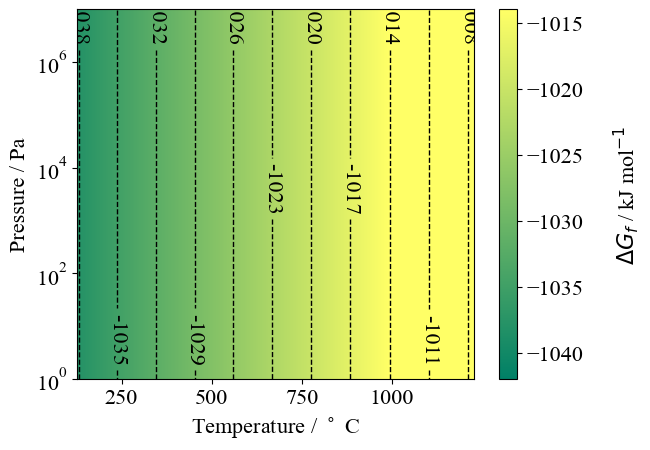

In [6]:
bulk_reaction = reactions.Reaction({Ba:1,Zr:1,S:3},{BaZrS3:1},temperature=T,pressure=P)
GFE = bulk_reaction.Dmu(xc='scan',units="kJ")
GFE.plot_TvsP(scale_range=[-1042,-1014],T_units="C")

Standard heat of formation phase diagram. This tells us that the perovskite is stable compared to the consituent elements in thier most stable forms. 

## 8Ba + 8Zr + S$_8$(g) --> 8BaZrS$_3$ 

To demarcate the regions where gaseous sulfur allotropes S2 and S8 dominate, we calculate the chemical potential of S2 formation (only), S8 formation (only) and then use the wonder of Numpy to create a boolean array where S8 is more stable than S2. This can be plotted as a contour plot, with the level set at 0.5 to demarcate region of True (=1) and False (=0).

Note that our sampling of T and P space has to be quite dense to allow for a smooth line.

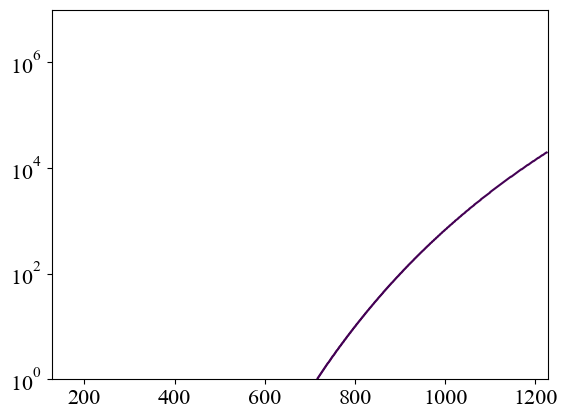

In [8]:
S2_formation = reactions.Reaction({},{S2:1},temperature=T,pressure=P)
S2_mu = S2_formation.Dmu(xc='scan',units="kJ")

S8_formation = reactions.Reaction({},{S8:1},temperature=T,pressure=P)
S8_mu = S8_formation.Dmu(xc='scan',units="kJ")

plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])
plt.yscale('log')

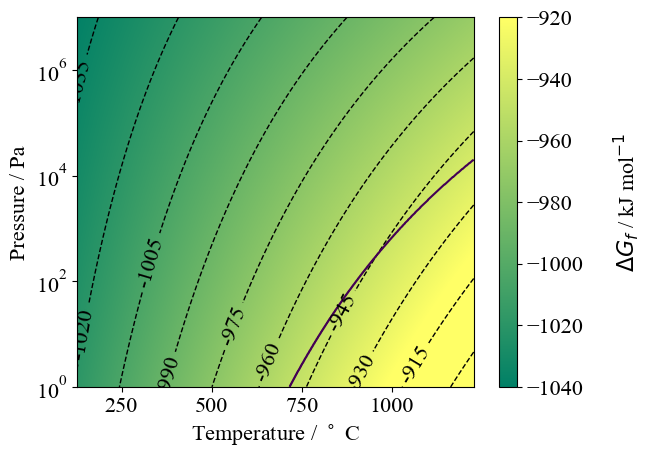

In [59]:
S8_reaction = reactions.Reaction({Ba:8,Zr:8,S8:3},{BaZrS3:8},temperature=T,pressure=P,fu=8)
GFE = S8_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-1040, -920],T_units="C")
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])

## 2Ba + 2Zr + 3S$_2$(g) --> 2BaZrS$_3$ 

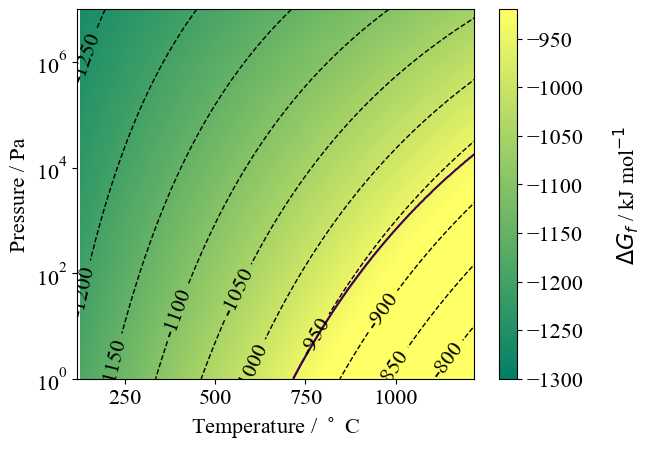

In [60]:
S2_reaction = reactions.Reaction({Ba:2,Zr:2,S2:3},{BaZrS3:2},temperature=T,pressure=P,fu=2)
GFE = S2_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-1300, -920],T_units="C")
plt.xlim(117,1217)
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])

## 2Ba + 2Zr + 6S$_m$(g) --> 2BaZrS$_3$

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

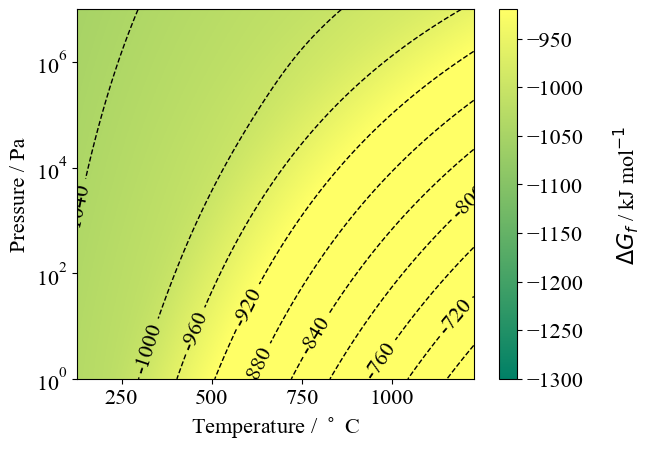

In [61]:
Sg_reaction = reactions.Reaction({Ba:1,Zr:1,S_g:3},{BaZrS3:1},temperature=T,pressure=P)
GFE = Sg_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-1300, -920],T_units="C")

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

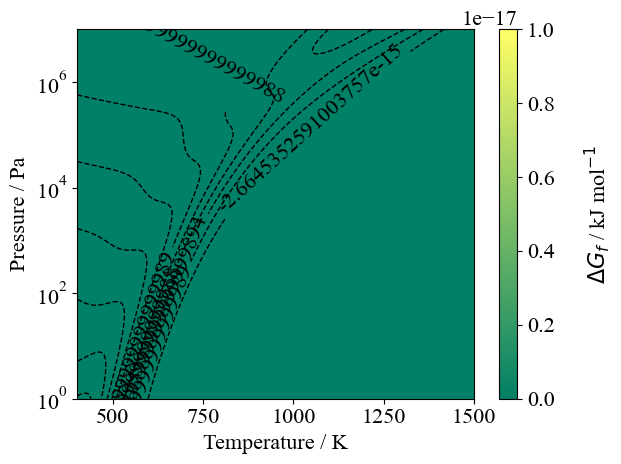

In [82]:
comparison = potential.Potential(np.diff(Sg_reaction.Dmu(units="kJ",xc='scan').potential-S2_reaction.Dmu(units="kJ",xc='scan').potential),T[1:],P)
comparison.plot_TvsP(scale_range=[0,1E-17],precision=3)

In [92]:
Sg_reaction.Dmu(units="kJ",xc='scan').potential-S2_reaction.Dmu(units="kJ",xc='scan').potential


array([[151.91905727, 151.58610238, 151.25290941, ..., 101.12112851,
        101.10818342, 101.09526882],
       [151.98984013, 151.65729044, 151.32450072, ..., 101.12112851,
        101.10818342, 101.09526883],
       [152.0604372 , 151.72829147, 151.39590386, ..., 101.12112851,
        101.10818342, 101.09526883],
       ...,
       [212.36363228, 212.21276677, 212.06194139, ..., 101.14643587,
        101.13235108, 101.11834359],
       [212.42399863, 212.27329929, 212.1226401 , ..., 101.1482034 ,
        101.13404614, 101.1199688 ],
       [212.48436499, 212.33383182, 212.18333881, ..., 101.15008669,
        101.13585273, 101.12170146]])

In [95]:
print(P)

[[1.00000000e+00]
 [1.01626509e+00]
 [1.03279473e+00]
 [1.04959323e+00]
 [1.06666496e+00]
 [1.08401436e+00]
 [1.10164595e+00]
 [1.11956432e+00]
 [1.13777413e+00]
 [1.15628013e+00]
 [1.17508713e+00]
 [1.19420003e+00]
 [1.21362380e+00]
 [1.23336350e+00]
 [1.25342427e+00]
 [1.27381132e+00]
 [1.29452998e+00]
 [1.31558562e+00]
 [1.33698374e+00]
 [1.35872990e+00]
 [1.38082977e+00]
 [1.40328908e+00]
 [1.42611371e+00]
 [1.44930957e+00]
 [1.47288272e+00]
 [1.49683929e+00]
 [1.52118552e+00]
 [1.54592774e+00]
 [1.57107239e+00]
 [1.59662602e+00]
 [1.62259529e+00]
 [1.64898694e+00]
 [1.67580786e+00]
 [1.70306503e+00]
 [1.73076553e+00]
 [1.75891659e+00]
 [1.78752553e+00]
 [1.81659979e+00]
 [1.84614695e+00]
 [1.87617469e+00]
 [1.90669084e+00]
 [1.93770334e+00]
 [1.96922026e+00]
 [2.00124980e+00]
 [2.03380031e+00]
 [2.06688025e+00]
 [2.10049824e+00]
 [2.13466303e+00]
 [2.16938352e+00]
 [2.20466874e+00]
 [2.24052787e+00]
 [2.27697026e+00]
 [2.31400538e+00]
 [2.35164288e+00]
 [2.38989257e+00]
 [2.428764

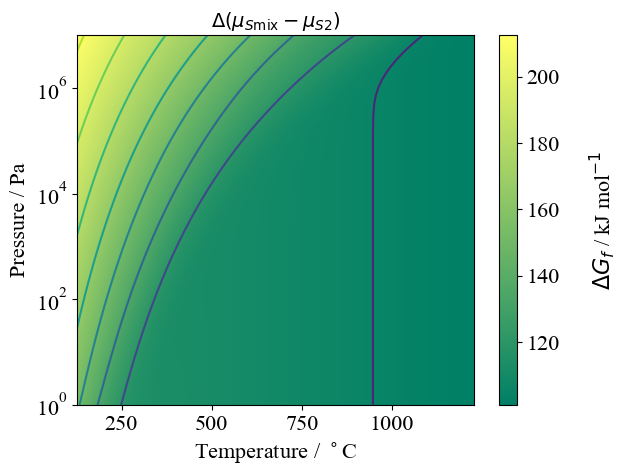

In [125]:
T = np.linspace(400,1500,1000) # K
P = np.logspace(0,7,1000)
potential = Sg_reaction.Dmu(units="kJ",xc='scan').potential-S2_reaction.Dmu(units="kJ",xc='scan').potential

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
colormap = plt.get_cmap("summer")
a = plt.contour(T-273,P,potential)
plt.pcolormesh(T-273,P,potential,cmap=colormap,shading="auto",)
colours = plt.colorbar()
colours.set_label("$\Delta G_f$ / kJ mol$^{-1}$", labelpad=20)
plt.yscale('log')
plt.xlabel("Temperature / {0}".format('$^\circ$C'))
plt.ylabel("Pressure / {0}".format('Pa'))
plt.title("$\Delta (\mu_{S\mathrm{mix}}-\mu_{S2})$",size=14)
plt.savefig("s2_mix.png")

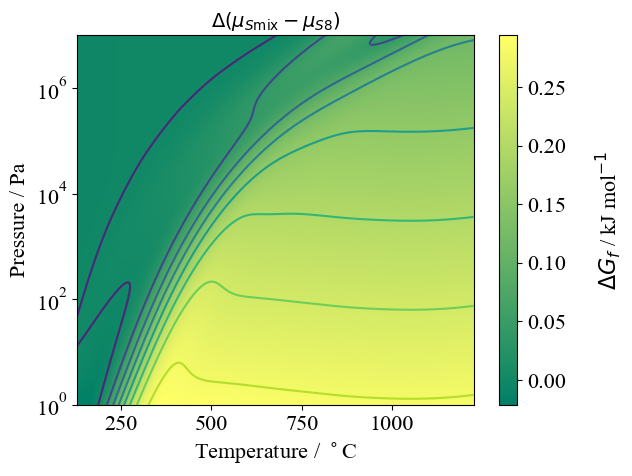

In [128]:
T = np.linspace(400,1500,1000)[1:] # K
P = np.logspace(0,7,1000)
potential = np.diff(Sg_reaction.Dmu(units="kJ",xc='scan').potential-S8_reaction.Dmu(units="kJ",xc='scan').potential)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
colormap = plt.get_cmap("summer")
a = plt.contour(T-273,P,potential)
plt.pcolormesh(T-273,P,potential,cmap=colormap,shading="auto",)
colours = plt.colorbar()
colours.set_label("$\Delta G_f$ / kJ mol$^{-1}$", labelpad=20)
plt.yscale('log')
plt.xlabel("Temperature / {0}".format('$^\circ$C'))
plt.ylabel("Pressure / {0}".format('Pa'))
plt.title("$\Delta (\mu_{S\mathrm{mix}}-\mu_{S8})$",size=14)
plt.savefig("s8_mix.png")

# Formation from solid binaries
## BaS + ZrS$_2$ --> BaZrS$_3$ 

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

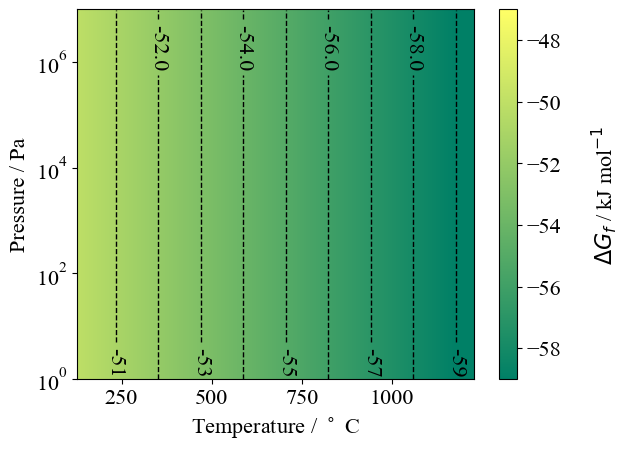

In [11]:
bulk_reaction = reactions.Reaction({BaS:1, ZrS2:1},{BaZrS3:1},temperature=T, pressure=P, fu=1)
GFE = bulk_reaction.Dmu(units="kJ",xc="scan")
GFE.plot_TvsP(scale_range=[-59,-47],precision='%3.1f',T_units="C")

## BaS$_2$ + ZrS (Tetragonal) --> BaZrS$_3$

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

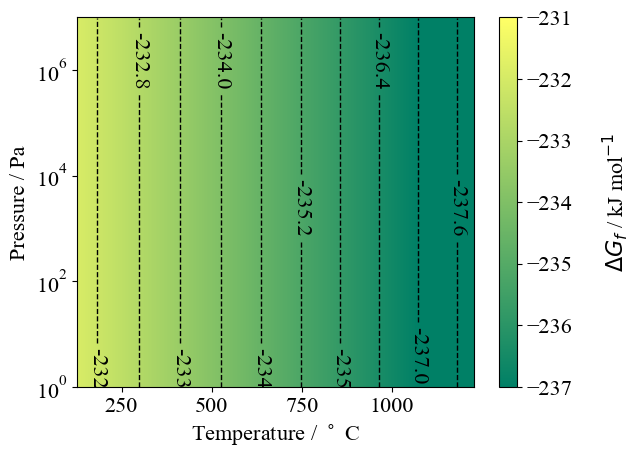

In [12]:
bulk_reaction = reactions.Reaction({BaS2:1, ZrS_P4:1},{BaZrS3:1},temperature=T, pressure=P, fu=1)
GFE = bulk_reaction.Dmu(units="kJ",xc="scan")
GFE.plot_TvsP(scale_range=[-237,-231],precision='%3.1f',T_units="C")

## BaS$_2$ + ZrS (cubic) --> BaZrS$_3$ 

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

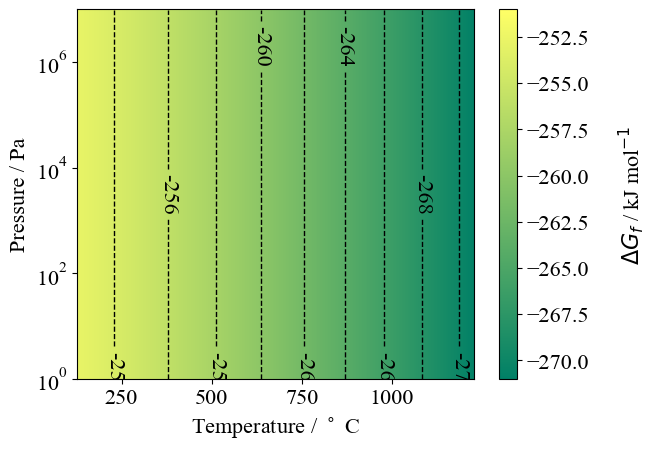

In [14]:
bulk_reaction = reactions.Reaction({BaS2:1, ZrS_Fm:1},{BaZrS3:1},temperature=T, pressure=P, fu=1)
GFE = bulk_reaction.Dmu(units="kJ",xc="scan")
GFE.plot_TvsP(scale_range=[-271,-251],T_units="C")

## BaS$_3$ (Tetragonal) + Zr --> BaZrS$_3$ 

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

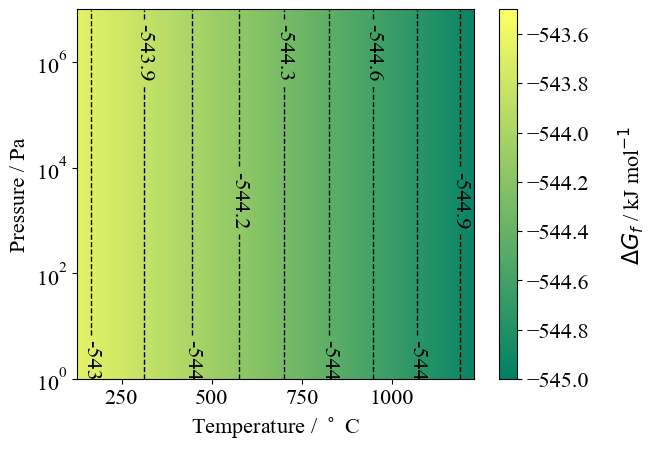

In [15]:
bulk_reaction = reactions.Reaction({BaS3_P4:1, Zr:1},{BaZrS3:1},temperature=T, pressure=P, fu=1)
GFE = bulk_reaction.Dmu(units="kJ",xc="scan")
GFE.plot_TvsP(scale_range=[-545,-543.5],precision='%3.1f',T_units="C")

## BaS$_3$ (Tetragonal) + Zr --> BaZrS$_3$ 

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

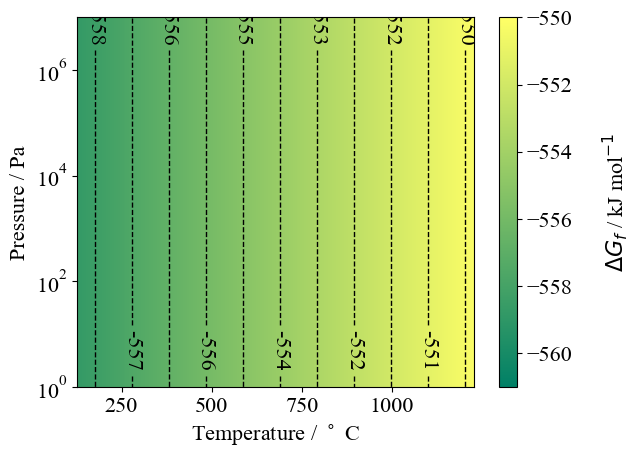

In [16]:
bulk_reaction = reactions.Reaction({BaS3_P2:1, Zr:1},{BaZrS3:1},temperature=T, pressure=P, fu=1)
GFE = bulk_reaction.Dmu(units="kJ",xc="scan")
GFE.plot_TvsP(scale_range=[-561,-550],T_units="C")

## BaS + Zr + 2S --> BaZrS$_3$ 

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

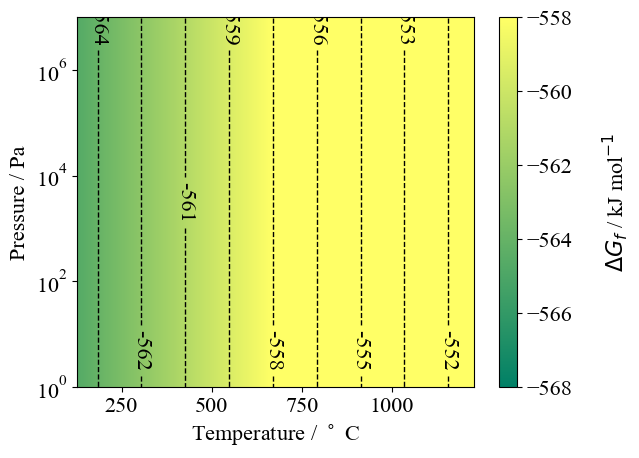

In [17]:
bulk_reaction = reactions.Reaction({BaS:1,Zr:1,S:2},{BaZrS3:1},temperature=T, pressure=P, fu=1)
GFE_4310 = bulk_reaction.Dmu(units="kJ",xc='scan')
GFE_4310.plot_TvsP(scale_range=[-568,-558],T_units="C")

# Reactions in equilibrium with sulfur vapour

## BaS + S$_2$ + Zr --> BaZrS$_3$

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

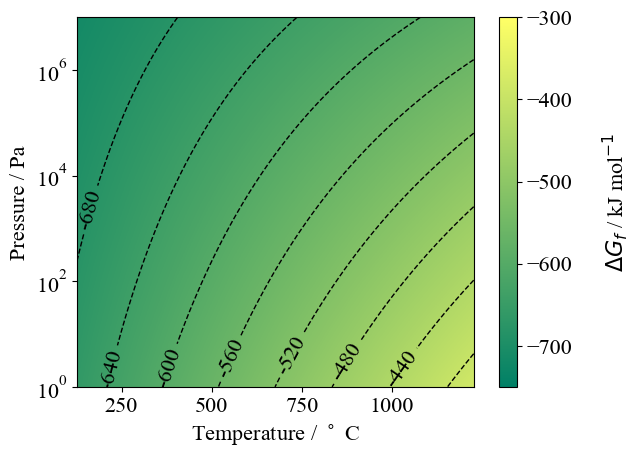

In [18]:
S2_reaction = reactions.Reaction({BaS:1,S2:1,Zr:1},{BaZrS3:1}, temperature=T, pressure=P,fu=1)
GFE = S2_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-750, -300],T_units="C")

## 8BaS + 2S$_8$ + 8Zr --> 8BaZrS$_3$ 

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

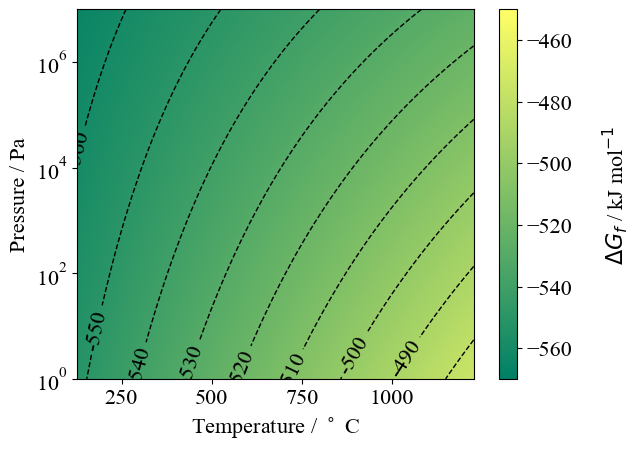

In [19]:
S8_reaction = reactions.Reaction({BaS:8,S8:2,Zr:8},{BaZrS3:8}, temperature=T, pressure=P,fu=8)
GFE = S8_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-570, -450],T_units="C")

## BaS + 2S$_m$ + Zr --> BaZrS$_3$

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

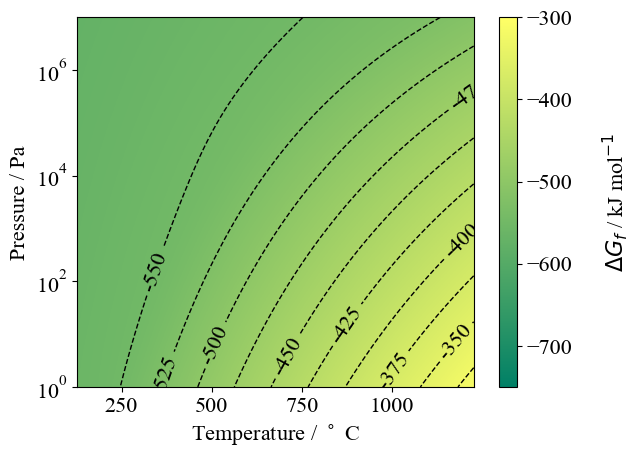

In [20]:
S2_reaction = reactions.Reaction({BaS:1,S_g:2,Zr:1},{BaZrS3:1}, temperature=T, pressure=P,fu=1)
GFE = S2_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-750, -300],T_units="C")

## 2BaS + 2ZrS$_3$ --> 2BaZrS$_3$ + S$_2$ 

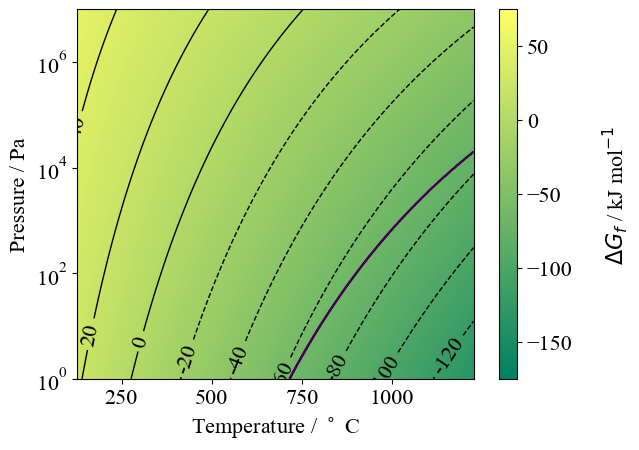

In [21]:
bulk_reaction = reactions.Reaction({BaS:2, ZrS3_P2:2},{BaZrS3:2, S2:1},temperature=T, pressure=P, fu=2)
GFE = bulk_reaction.Dmu(units="kJ",xc="scan")
GFE.plot_TvsP(scale_range=[-175,75],T_units="C")
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])

## 8BaS + 8ZrS$_3$ --> 8BaZrS$_3$ + S$_8$ 

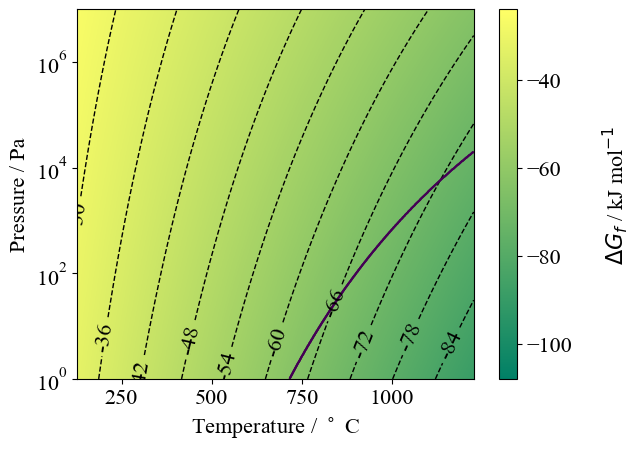

In [22]:
bulk_reaction = reactions.Reaction({BaS:8, ZrS3_P2:8},{BaZrS3:8, S8:1},temperature=T, pressure=P, fu=8)
GFE = bulk_reaction.Dmu(units="kJ",xc="scan")
GFE.plot_TvsP(scale_range=[-108,-24],T_units="C")
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])

## 8BaS + 8ZrS$_3$ --> 8BaZrS$_3$ + 8S$_m$ 

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

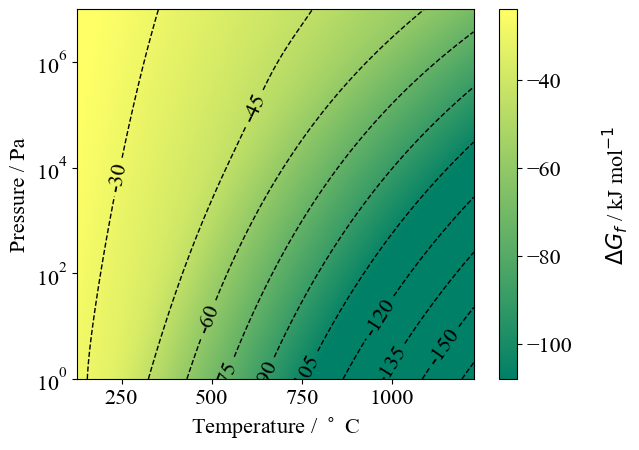

In [23]:
bulk_reaction = reactions.Reaction({BaS:8, ZrS3_P2:8},{BaZrS3:8, S_g:8},temperature=T, pressure=P, fu=8)
GFE = bulk_reaction.Dmu(units="kJ",xc="scan")
GFE.plot_TvsP(scale_range=[-108,-24],T_units="C")

## BaS$_2$ + ZrS$_3$ --> BaZrS$_3$ + S$_2$

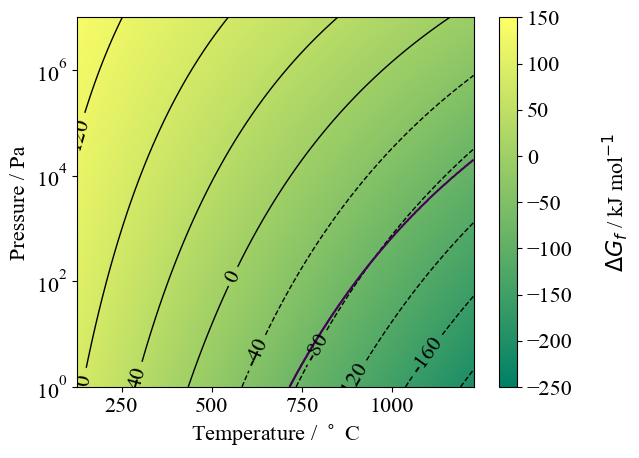

In [24]:
bulk_reaction = reactions.Reaction({BaS2:1, ZrS3_P2:1},{BaZrS3:1, S2:1},temperature=T, pressure=P, fu=1)
GFE = bulk_reaction.Dmu(units="kJ",xc="scan")
GFE.plot_TvsP(scale_range=[-250,150],T_units="C")
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])

## 8BaS$_2$ + 8ZrS$_3$ --> 8BaZrS$_3$ + 2S$_8$

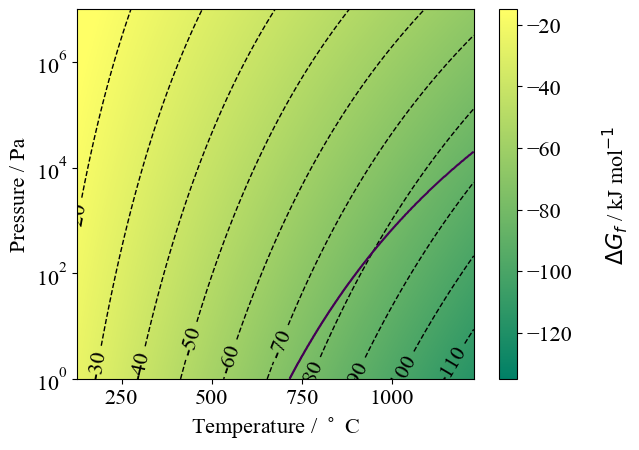

In [25]:
bulk_reaction = reactions.Reaction({BaS2:8, ZrS3_P2:8},{BaZrS3:8, S8:2},temperature=T, pressure=P, fu=8)
GFE = bulk_reaction.Dmu(units="kJ",xc="scan")
GFE.plot_TvsP(scale_range=[-135,-15],T_units="C")
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])

## 8BaS$_2$ + 8ZrS$_3$ --> 8BaZrS$_3$ + 16S$_m$

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

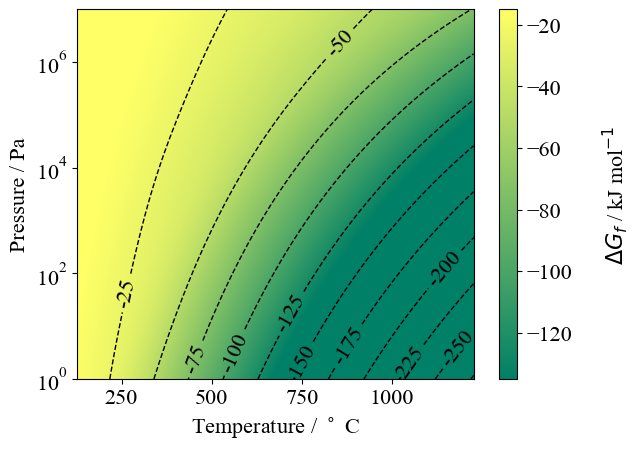

In [53]:
bulk_reaction = reactions.Reaction({BaS2:8, ZrS3_P2:8},{BaZrS3:8, S_g:16},temperature=T, pressure=P, fu=8)
GFE = bulk_reaction.Dmu(units="kJ",xc="scan")
GFE.plot_TvsP(scale_range=[-135,-15],T_units="C")

##  2BaZrS$_3$ +  3S$_2$  --> 2BaS$_3$ + 2ZrS$_3$

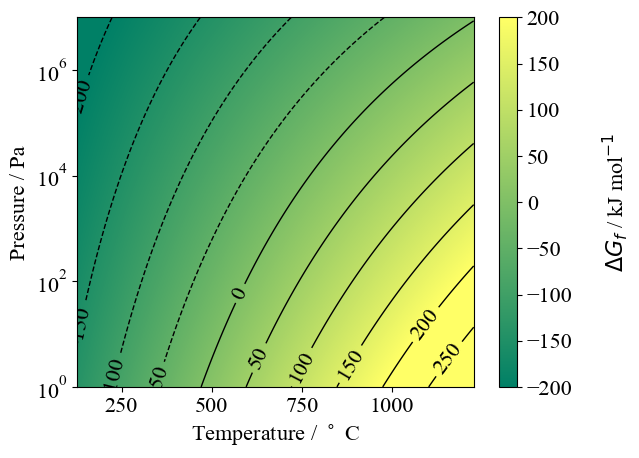

In [14]:
bulk_reaction = reactions.Reaction({BaZrS3:2,S2:3},{BaS3_P4:2,ZrS3_P2:2},temperature=T, pressure=P, fu=2)
GFE = bulk_reaction.Dmu(units="kJ",xc='scan')
plt = GFE.plot_TvsP(scale_range=[-200,200],T_units="C")
#plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])
#plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])
plt.savefig("extension_1.png")

## 8BaS$_3$ + 8ZrS$_3$ --> 8BaZrS$_3$ +  3S$_8$

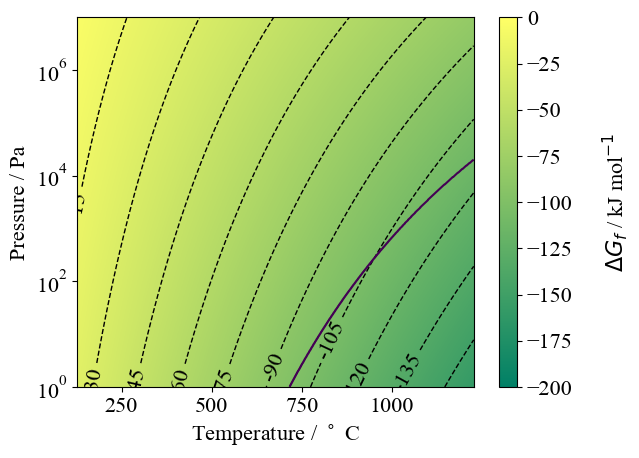

In [55]:
bulk_reaction = reactions.Reaction({BaS3_P4:8,ZrS3_P2:8},{BaZrS3:8,S8:3},temperature=T, pressure=P, fu=8)
GFE = bulk_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-200,0],T_units="C")
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])

## 2BaS$_3$ + 2ZrS$_3$ --> 2BaZrS$_3$ +  6S$_m$

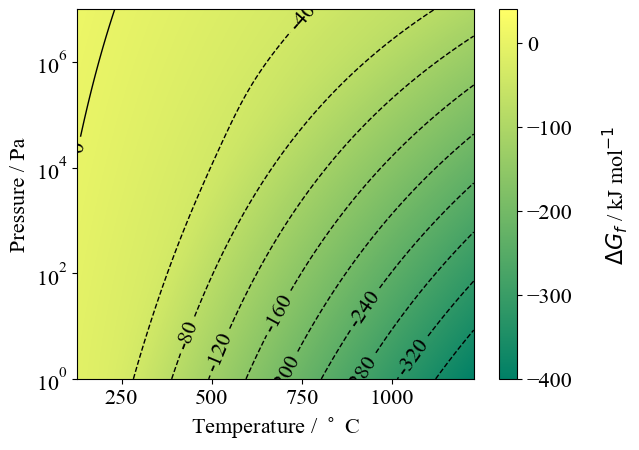

In [15]:
bulk_reaction = reactions.Reaction({BaS3_P4:2,ZrS3_P2:2},{BaZrS3:2,S_g:6},temperature=T, pressure=P, fu=2)
GFE = bulk_reaction.Dmu(units="kJ",xc='scan')
plt = GFE.plot_TvsP(scale_range=[-400,40],T_units="C")

## 2BaS$_2$ + 2ZrS$_2$ --> 2BaZrS$_3$ +  S$_2$ 

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

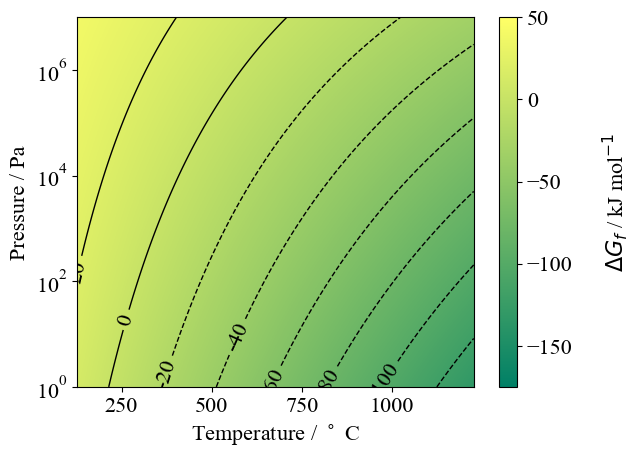

In [28]:
bulk_reaction = reactions.Reaction({BaS2:2,ZrS2:2},{BaZrS3:2,S2:1},temperature=T, pressure=P, fu=2)
GFE = bulk_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-175,50],T_units="C")

## 8BaS$_2$ + 8ZrS$_2$ --> 8BaZrS$_3$ +  S$_8$

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

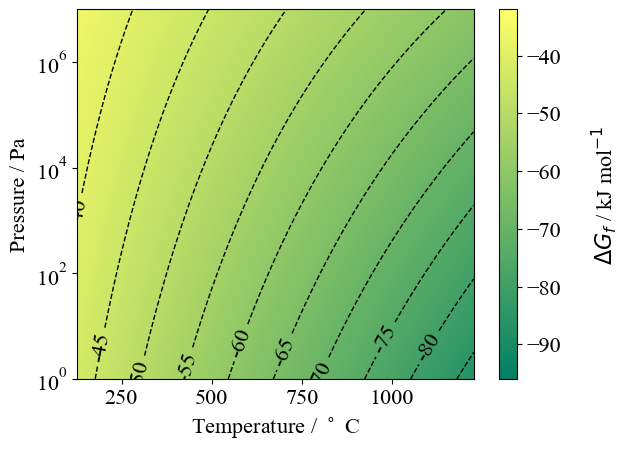

In [29]:
bulk_reaction = reactions.Reaction({BaS2:8,ZrS2:8},{BaZrS3:8,S8:1},temperature=T, pressure=P, fu=8)
GFE = bulk_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-96,-32],T_units="C")

## BaS$_3$ + ZrS$_2$ --> BaZrS$_3$ +  S$_2$

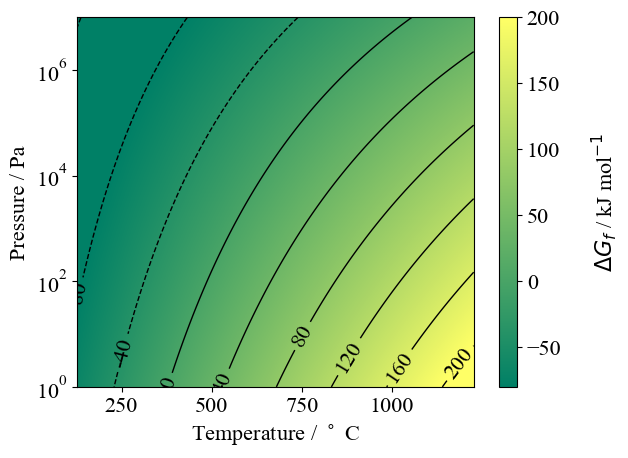

In [13]:
bulk_reaction = reactions.Reaction({BaZrS3:1,S2:1},{BaS3_P4:1,ZrS2:1},temperature=T, pressure=P, fu=1)
GFE = bulk_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-80,200],T_units="C")
plt.savefig("extension_2.png")

## 8BaS$_3$ + 8ZrS$_2$ --> 8BaZrS$_3$ +  2S$_8$ 

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

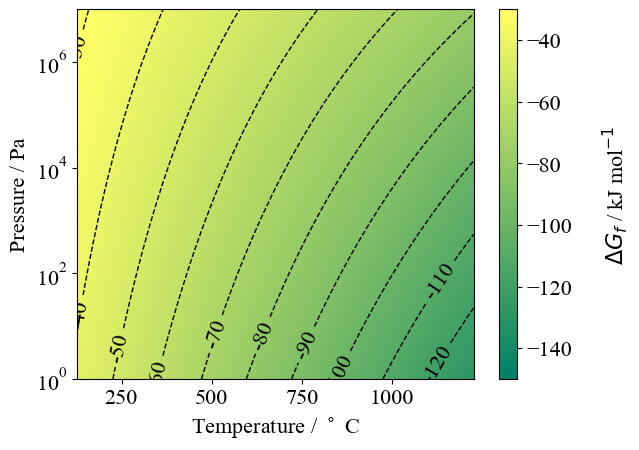

In [31]:
bulk_reaction = reactions.Reaction({BaS3_P4:8,ZrS2:8},{BaZrS3:8,S8:2},temperature=T, pressure=P, fu=8)
GFE = bulk_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-150,-30],T_units="C")

## BaS$_3$ + ZrS$_2$ --> BaZrS$_3$ +  2S$_m$

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

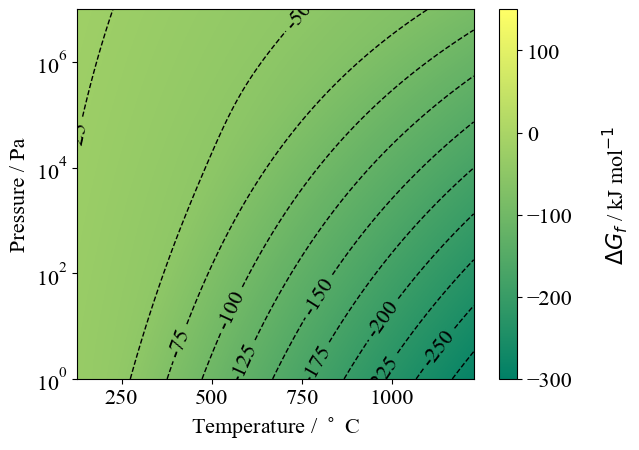

In [32]:
bulk_reaction = reactions.Reaction({BaS3_P4:1,ZrS2:1},{BaZrS3:1,S_g:2},temperature=T, pressure=P, fu=1)
GFE = bulk_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-300,150],T_units="C")

# S transfer between binaries
### BaS$_3$ + ZrS$_2$ --> BaS$_2$ + ZrS$_3$

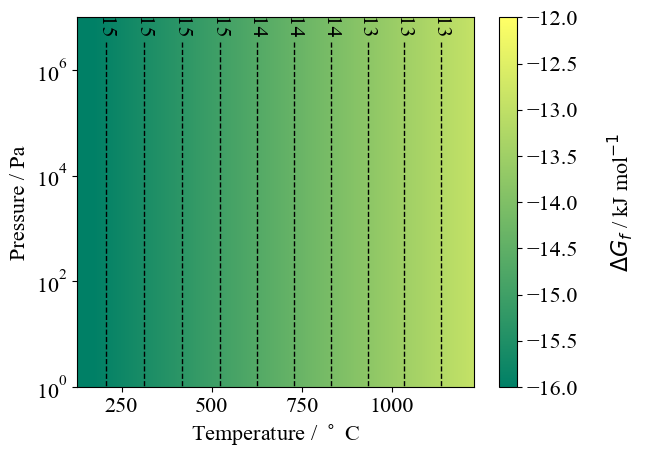

In [56]:
bulk_reaction = reactions.Reaction({BaS3_P4:1,ZrS2:1},{BaS2:1,ZrS3_P2:1},temperature=T, pressure=P, fu=1)
GFE = bulk_reaction.Dmu(units="kJ",xc='scan')
plt = GFE.plot_TvsP(scale_range=[-16,-12],T_units="C")
plt.savefig("BS3_ZrS2_1.png")

### BaS$_3$ + ZrS$_2$ --> BaS$_2$ + ZrS$_2$ + S$_m$

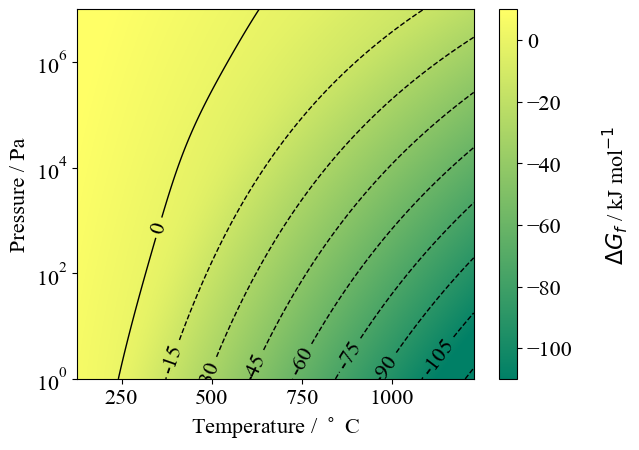

In [58]:
bulk_reaction = reactions.Reaction({BaS3_P4:1,ZrS2:1},{BaS2:1,ZrS2:1,S_g:1},temperature=T, pressure=P, fu=1)
GFE = bulk_reaction.Dmu(units="kJ",xc='scan')
plt=GFE.plot_TvsP(scale_range=[-110,10],T_units="C")
plt.savefig("BS3_ZrS2_2.png")

### BaS$_2$ + ZrS$_2$ + S$_m$ --> BaS$_2$ + ZrS$_3$

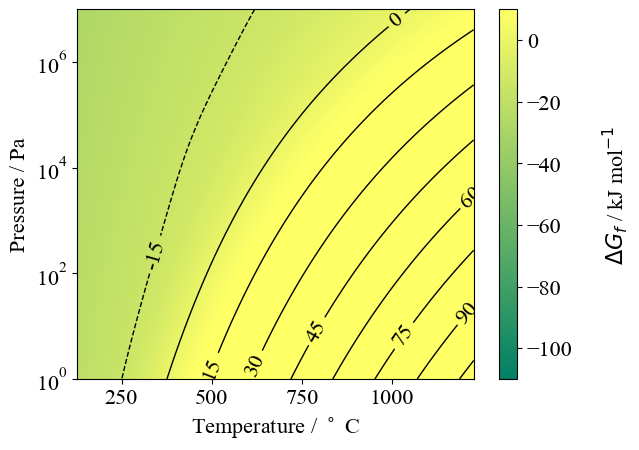

In [57]:
bulk_reaction = reactions.Reaction({BaS2:1,ZrS2:1,S_g:1},{BaS2:1,ZrS3_P2:1},temperature=T, pressure=P, fu=1)
GFE = bulk_reaction.Dmu(units="kJ",xc='scan')
plt = GFE.plot_TvsP(scale_range=[-110,10],T_units="C")
plt.savefig("BS3_ZrS2_3.png")


## Ba-S system: identifying most stable binaries during anneal

### with S$_2$ 

To consider stability of Ba-S compounds when annealing in sulfur we will calculate the Gibbs free energy of each of the following reactions, and then display the product with the lowest formation energy as a function of temperature and pressure. Note that we are not assuming that elemental precursors are used. This is exactly equivalent to comparing each of the compounds in turn, and discarding the one with the highest energy.

2Ba +  3S2 --> Ba2S3 +(3/2)S2
2Ba +  3S2 --> 2BaS  + 2S2     
2Ba +  3S2 --> 2BaS2 +  S2     
2Ba +  3S2 --> 2BaS3 (P4)     
2Ba +  3S2 --> 2BaS3 (P2)  

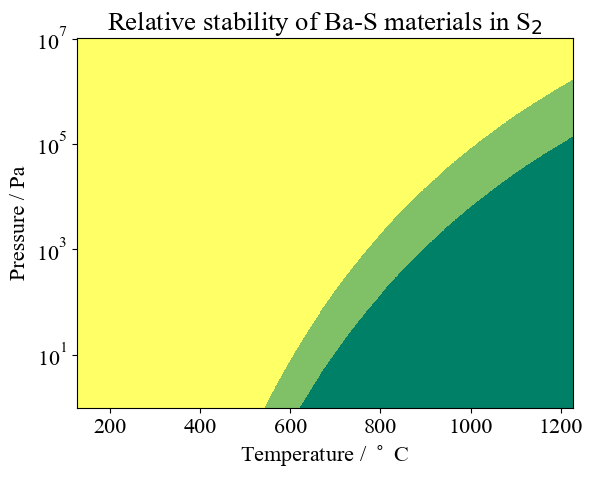

In [134]:
Ba2S3_reaction = reactions.Reaction({Ba:4,S2:6},{Ba2S3:1, S2:1.5},temperature=T, pressure=P, fu=4)
BaS_reaction = reactions.Reaction({Ba:4,S2:6},{BaS:4,S2:4},temperature=T,pressure=P,fu=4)
BaS2_reaction = reactions.Reaction({Ba:4,S2:6},{BaS2:4,S2:2},temperature=T,pressure=P,fu=4)
BaS3_reaction = reactions.Reaction({Ba:4,S2:6},{BaS3_P4:4},temperature=T,pressure=P,fu=4)
BaS3_P2_reaction = reactions.Reaction({Ba:4,S2:6},{BaS3_P2:4},temperature=T,pressure=P,fu=4)

BaS_system = potentials.Potentials(Ba2S3_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),BaS_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),BaS2_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),BaS3_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),BaS3_P2_reaction.Dmu(units="kJ",xc='scan',T=T,P=P))
plt = BaS_system.plot_TvsP(material_labels=["BaS","BaS2","BaS3"],log_scale=True,T_units="C")
plt.title("Relative stability of Ba-S materials in S$_2$")
plt.savefig("Ba_S_stability_S2")
#plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])

# the solid line denotes where chemical potential of S2 and S8 are equal.

To help demonstrate that this is exactly equivalent to finding the lowest formation energy amongst a range of posible products, we can create a filled contour plot where the gibbs free energy of BaS3 is less than the Gibbs free energy of BaS2. Green is where BaS3 gibbs is less than BaS2 gibbs. We see it lines up perfectly with yellow region above. Can do similar analysis with e.g. BaS2 and BaS to persuade that we have found the lowest energy products in each region.

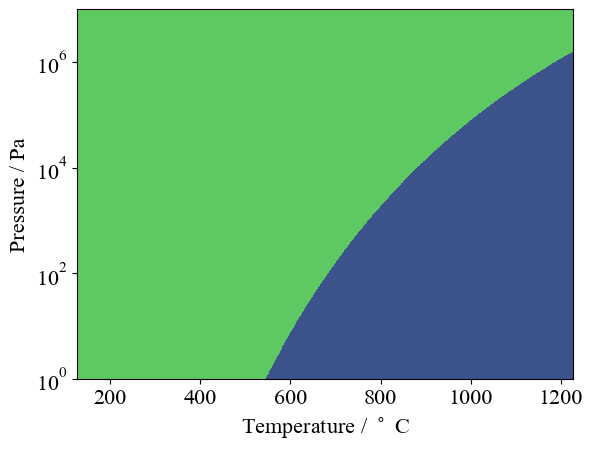

In [46]:
plt = BaS_system.plot_TvsP(material_labels=["BaS","BaS2","BaS3"],log_scale=True,T_units="C")
plt.contourf(T-273,P.flatten(),BaS3_reaction.Dmu(xc='scan').potential <= BaS2_reaction.Dmu(xc='scan').potential, )

### with S$_8$

We repeat the same process, but now with S8 allotrope.

8Ba +  3S8 --> 8BaS   +  2S8        
8Ba +  3S8 --> 8BaS2  +  S8       
8Ba +  3S8 --> 8BaS3 (P2)         
8Ba +  3S8 --> 8BaS3 (P4)    
8Ba +  3S8 --> 4Ba2S3 + (3/2)S8

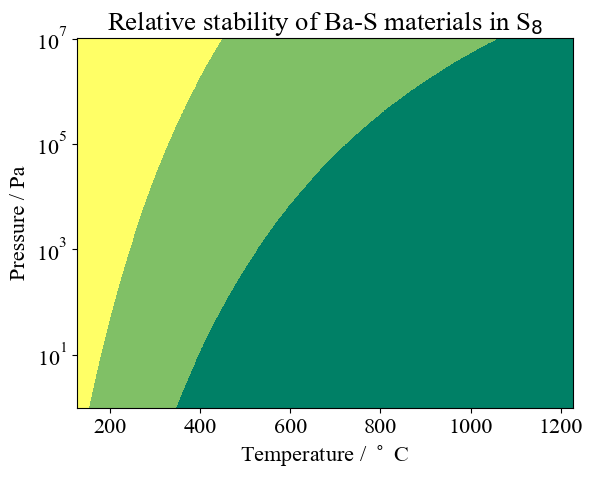

In [133]:
BaS_reaction = reactions.Reaction({Ba:8,S8:3},{BaS:8,S8:2},temperature=T,pressure=P,fu=8)
BaS2_reaction = reactions.Reaction({Ba:8,S8:3},{BaS2:8,S8:1},temperature=T,pressure=P,fu=8)
BaS3_reaction = reactions.Reaction({Ba:8,S8:3},{BaS3_P4:8},temperature=T,pressure=P,fu=8)
BaS3_P2_reaction = reactions.Reaction({Ba:8,S8:3},{BaS3_P2:8},temperature=T,pressure=P,fu=8)
Ba2S3_reaction = reactions.Reaction({Ba:8, S8:3}, {Ba2S3:4, S8:1.5}, temperature=T, pressure=P, fu=8)
BaS_system = potentials.Potentials(BaS3_P2_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),Ba2S3_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),BaS_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),BaS2_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),BaS3_reaction.Dmu(units="kJ",xc='scan',T=T,P=P))
plt = BaS_system.plot_TvsP(material_labels=["BaS","BaS2","BaS3"],log_scale=True,T_units="C")
#plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])
plt.title("Relative stability of Ba-S materials in S$_8$")
plt.savefig("Ba_S_stability_S8")

### with the sulfur model for S$_\mathrm{m}$

Same analysis again but with the model for sulfur gas in equilibrium.

8Ba +  24S_g --> 8BaS   +  16S_g        
8Ba +  24S_g --> 8BaS2  +  8S_g       
8Ba +  24S_g --> 8BaS3 (P2)           
8Ba +  24S_g --> 8BaS3 (P4)  
8Ba +  24S_g --> 4Ba2S3 + 12S_g

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_yticks'

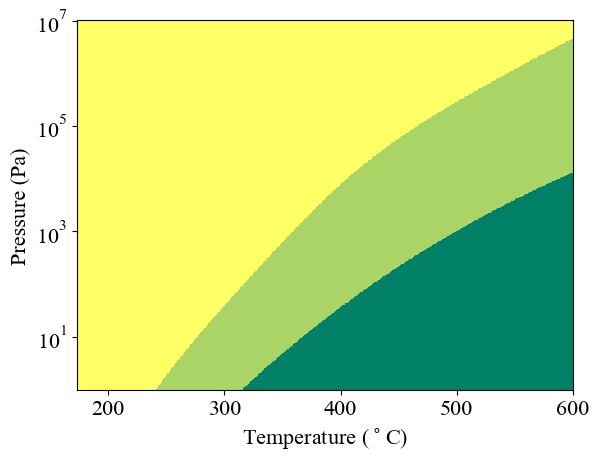

In [47]:
BaS_reaction = reactions.Reaction({Ba:8,S_g:24},{BaS:8,S_g:16},temperature=T,pressure=P,fu=8)
BaS2_reaction = reactions.Reaction({Ba:8,S_g:24},{BaS2:8,S_g:8},temperature=T,pressure=P,fu=8)
BaS3_reaction = reactions.Reaction({Ba:8,S_g:24},{BaS3_P4:8},temperature=T,pressure=P,fu=8)
BaS3_P2_reaction = reactions.Reaction({Ba:8,S_g:24},{BaS3_P2:8},temperature=T,pressure=P,fu=8)
Ba2S3_reaction = reactions.Reaction({Ba:8, S8:3}, {Ba2S3:4, S_g:12}, temperature=T, pressure=P, fu=8)
BaS_system = potentials.Potentials(BaS_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),BaS_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),BaS2_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),BaS3_reaction.Dmu(units="kJ",xc='scan',T=T,P=P))
plt = BaS_system.plot_TvsP(material_labels=["BaS","BaS2","BaS3","BaS3_P2"],log_scale=True,T_units="C")
plt.xlim([173,600])
plt.xlabel("Temperature ($^\circ$C)")
plt.ylabel("Pressure (Pa)")
plt.set_yticks([10^0])

## Zr-S system

Same approach now applied to the Zr-S system.

### with S$_2$
6Zr + 9S2 --> 6ZrS + 6S2  
6Zr + 9S2 --> 6ZrS2 + 3S2           
6Zr + 9S2 --> 6ZrS3   
6Zr + 9S2 --> 2Zr3S4 + 5S2  

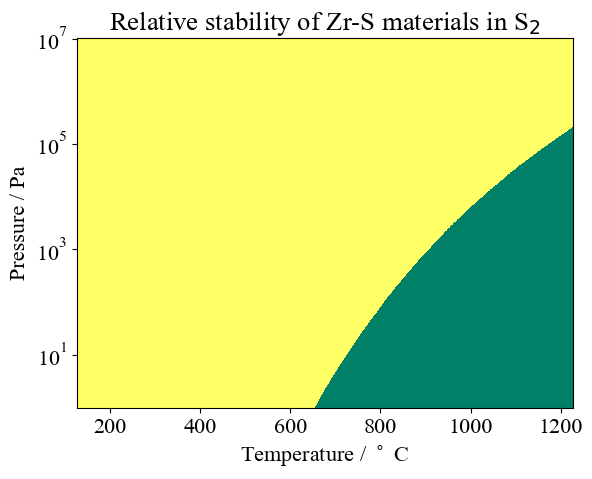

In [135]:
ZrS_reaction = reactions.Reaction({Zr:6,S2:9},{ZrS_P4:6,S2:6},temperature=T,pressure=P,fu=2)
ZrS2_reaction = reactions.Reaction({Zr:6,S2:9},{ZrS2:6,S2:3},temperature=T,pressure=P,fu=2)
ZrS3_reaction = reactions.Reaction({Zr:6,S2:9},{ZrS3_P2:6},temperature=T,pressure=P,fu=2)
Zr3S4_reaction = reactions.Reaction({Zr:6,S2:9},{Zr3S4:2,S2:5},temperature=T,pressure=P,fu=2)
ZrS_system = potentials.Potentials(ZrS2_reaction.Dmu(xc='scan'),ZrS3_reaction.Dmu(xc='scan'),ZrS_reaction.Dmu(xc='scan'),Zr3S4_reaction.Dmu(xc='scan'))

plt = ZrS_system.plot_TvsP(material_labels=["ZrS","ZrS2","ZrS3"],T_units="C")
#plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])
plt.title("Relative stability of Zr-S materials in S$_2$")
plt.savefig("Zr_S_stability_S2")

### with S$_8$
6Zr + 3S8 --> 6ZrS + (9/4)S8    
6Zr + 3S8 --> 6ZrS2 + (3/2)S8             
6Zr + 3S8 --> 6ZrS3 + (3/4)S8     
6Zr + 3S8 --> 2Zr3S4 + 2S8    


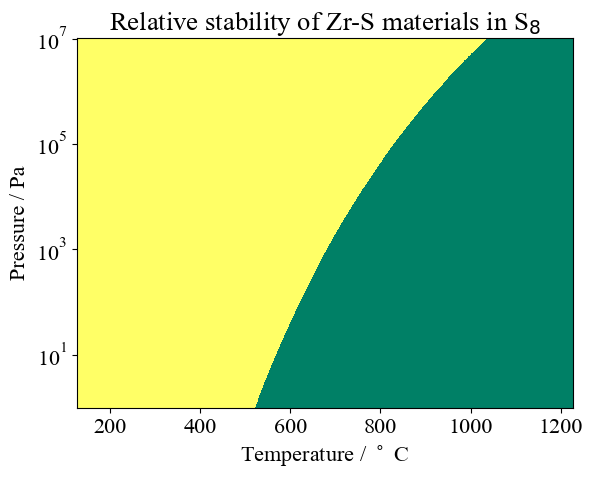

In [136]:
ZrS_reaction = reactions.Reaction({Zr:3,S8:3},{ZrS_P4:6,S8:9/4},temperature=T,pressure=P,fu=6)
ZrS2_reaction = reactions.Reaction({Zr:3,S8:3},{ZrS2:6,S8:3/2},temperature=T,pressure=P,fu=6)
ZrS3_reaction = reactions.Reaction({Zr:3,S8:3},{ZrS3_P2:6,S8:3/4},temperature=T,pressure=P,fu=6)
Zr3S4_reaction = reactions.Reaction({Zr:3,S8:3},{Zr3S4:2, S8:2},temperature=T,pressure=P,fu=6)
ZrS_system = potentials.Potentials(Zr3S4_reaction.Dmu(xc='scan'),ZrS_reaction.Dmu(xc='scan'),ZrS2_reaction.Dmu(xc='scan'),ZrS3_reaction.Dmu(xc='scan'))
plt = ZrS_system.plot_TvsP(material_labels=["ZrS","ZrS2","ZrS3"],T_units="C")
#plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])
plt.title("Relative stability of Zr-S materials in S$_8$")
plt.savefig("Zr_S_stability_S8")

### with the sulfur model for S$_\mathrm{m}$
8Zr + 24S_g --> 8ZrS + 16S_g         
8Zr + 24S_g --> 8ZrS2 + 8S_g                     
8Zr + 24S_g --> 8ZrS3            
8Zr + 24S_g --> (8/3)Zr3S4 + (13+1/3)S_g  

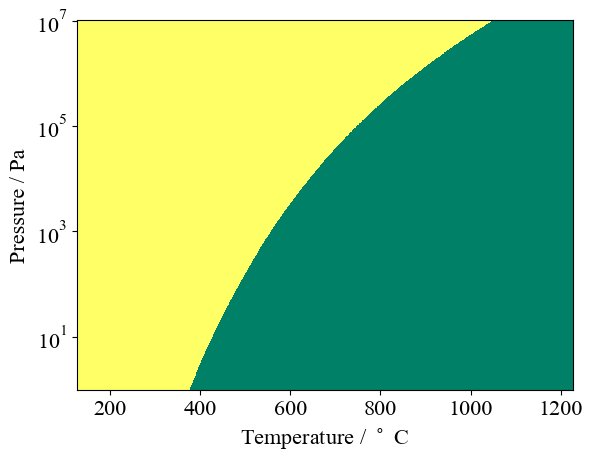

In [51]:
ZrS_reaction = reactions.Reaction({Zr:8,S_g:24},{ZrS_P4:8,S_g:16},temperature=T,pressure=P,fu=8)
ZrS2_reaction = reactions.Reaction({Zr:8,S_g:24},{ZrS2:8,S_g:8},temperature=T,pressure=P,fu=8)
ZrS3_reaction = reactions.Reaction({Zr:8,S_g:24},{ZrS3_P2:8},temperature=T,pressure=P,fu=8)
Zr3S4_reaction = reactions.Reaction({Zr:8,S_g:24},{Zr3S4:8/3, S_g:13+1/3},temperature=T,pressure=P,fu=8)
ZrS_system = potentials.Potentials(Zr3S4_reaction.Dmu(xc='scan'),ZrS_reaction.Dmu(xc='scan'),ZrS2_reaction.Dmu(xc='scan'),ZrS3_reaction.Dmu(xc='scan'))
plt = ZrS_system.plot_TvsP(material_labels=["ZrS","ZrS2","ZrS3"],T_units="C")

In [58]:
ZrS_reaction = reactions.Reaction({Zr:8,S_g:24},{ZrS_P4:8,S_g:16},temperature=T,pressure=P,fu=8)
ZrS2_reaction = reactions.Reaction({Zr:8,S_g:24},{ZrS2:8,S_g:8},temperature=T,pressure=P,fu=8)
ZrS3_reaction = reactions.Reaction({Zr:8,S_g:24},{ZrS3_P2:8},temperature=T,pressure=P,fu=8)
Zr3S4_reaction = reactions.Reaction({Zr:8,S_g:24},{Zr3S4:8/3, S_g:13+1/3},temperature=T,pressure=P,fu=8)

ZrS_system = potentials.Potentials(Zr3S4_reaction.Dmu(xc='scan'),ZrS_reaction.Dmu(xc='scan'),ZrS2_reaction.Dmu(xc='scan'),ZrS3_reaction.Dmu(xc='scan'))
ZrS_system.find_potential_minimum()
#plt = ZrS_system.plot_TvsP(material_labels=["ZrS","ZrS2","ZrS3"],T_units="C")
np.any(2 in ZrS_system.find_potential_minimum())   # 3,2

True

In [65]:
ZrS_system.find_potential_minimum()

array([[3., 3., 3., ..., 2., 2., 2.],
       [3., 3., 3., ..., 2., 2., 2.],
       [3., 3., 3., ..., 2., 2., 2.],
       ...,
       [3., 3., 3., ..., 2., 2., 2.],
       [3., 3., 3., ..., 2., 2., 2.],
       [3., 3., 3., ..., 2., 2., 2.]])

In [64]:
BaS_reaction = reactions.Reaction({Ba:8,S_g:24},{BaS:8,S_g:16},temperature=T,pressure=P,fu=8)
BaS2_reaction = reactions.Reaction({Ba:8,S_g:24},{BaS2:8,S_g:8},temperature=T,pressure=P,fu=8)
BaS3_reaction = reactions.Reaction({Ba:8,S_g:24},{BaS3_P4:8},temperature=T,pressure=P,fu=8)
BaS3_P2_reaction = reactions.Reaction({Ba:8,S_g:24},{BaS3_P2:8},temperature=T,pressure=P,fu=8)
Ba2S3_reaction = reactions.Reaction({Ba:8, S8:3}, {Ba2S3:4, S_g:12}, temperature=T, pressure=P, fu=8)
BaS_system = potentials.Potentials(BaS_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),BaS_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),BaS2_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),BaS3_reaction.Dmu(units="kJ",xc='scan',T=T,P=P))
BaS_system.find_potential_minimum()  # 3,2,0
np.any(0 in BaS_system.find_potential_minimum())

True

In [62]:
BaS_system.find_potential_minimum()

array([[3., 3., 3., ..., 0., 0., 0.],
       [3., 3., 3., ..., 0., 0., 0.],
       [3., 3., 3., ..., 0., 0., 0.],
       ...,
       [3., 3., 3., ..., 0., 0., 0.],
       [3., 3., 3., ..., 0., 0., 0.],
       [3., 3., 3., ..., 0., 0., 0.]])